### Importing fixed data from the Project.ipynb

In [1]:
%store -r data

In [2]:
data

,start_date,start_time,end_date,end_time,start_station,end_station,length,dataset,duration,gender,age
0,2019-06-02,11:56:01,2019-06-02,11:58:37,WH,WH,0.00,1,156,0,35.0
1,2019-06-02,17:41:53,2019-06-02,17:43:10,WH,WH,0.06,1,77,0,35.0
2,2019-06-03,11:19:48,2019-06-03,12:30:41,WH,WH,0.00,1,4253,0,35.0
3,2019-06-03,12:47:10,2019-06-03,12:53:28,55.0,55.0,0.96,1,378,NaN,NaN
4,2019-06-03,12:52:33,2019-06-03,12:54:08,55.0,55.0,0.01,1,95,1,27.0
...,...,...,...,...,...,...,...,...,...,...,...
1701590,2021-04-30,23:52:51,2021-05-01,00:28:09,1.0,1.0,6.82,3,2118,1,19.0
1701591,2021-04-30,23:53:50,2021-05-01,00:15:46,78.0,13.0,6.69,3,1316,1,48.0
1701592,2021-04-30,23:53:53,2021-04-30,23:58:42,1.0,11.0,1.22,3,289,0,81.0
1701593,2021-04-30,23:54:30,2021-05-01,00:02:03,11.0,34.0,2.35,3,453,NaN,NaN


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
print(data.columns)
print()
print(data.shape)

Index(['start_date', 'start_time', 'end_date', 'end_time', 'start_station',
       'end_station', 'length', 'dataset', 'duration', 'gender', 'age'],
      dtype='object')

(1701595, 11)


In [5]:
data.describe()

,length,dataset,duration,age
count,1.701595e+06,1.701595e+06,1.701595e+06,1.305546e+06
mean,2.661344e+00,1.613566e+00,1.141141e+03,2.938831e+01
std,2.394304e+00,5.805291e-01,4.006346e+03,1.344413e+01
min,0.000000e+00,1.000000e+00,3.000000e+01,-6.000000e+01
25%,1.030000e+00,1.000000e+00,3.580000e+02,2.000000e+01
50%,2.030000e+00,2.000000e+00,6.750000e+02,2.500000e+01
75%,3.590000e+00,2.000000e+00,1.368000e+03,3.500000e+01
max,1.618300e+02,3.000000e+00,1.370228e+06,2.210000e+02


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701595 entries, 0 to 1701594
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   start_date     object 
 1   start_time     object 
 2   end_date       object 
 3   end_time       object 
 4   start_station  object 
 5   end_station    object 
 6   length         float64
 7   dataset        int64  
 8   duration       int32  
 9   gender         object 
 10  age            float64
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 136.3+ MB


In [7]:
# checking for NaN values
data.isnull().sum()

start_date            0
start_time            0
end_date              0
end_time              0
start_station     78777
end_station       78661
length                0
dataset               0
duration              0
gender           396049
age              396049
dtype: int64

### Prepping data from modeling

In [8]:
from datetime import datetime

just_testing = data.copy()

# Replacing NaN values in age column
print('Age median to fill NaN values: ' + str(just_testing['age'].median()))
just_testing['age'] = just_testing['age'].fillna(just_testing['age'].median())    
      
# Converting column start_date values to datetime format    
just_testing['start_date'] = pd.to_datetime(just_testing['start_date'])

# Converting column end_date values to datetime format 
just_testing['end_date'] = pd.to_datetime(just_testing['end_date'])

# Converting floats in column ageto integers
just_testing['age'] = just_testing['age'].astype(int)

Age median to fill NaN values: 25.0


In [9]:
just_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701595 entries, 0 to 1701594
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   start_date     datetime64[ns]
 1   start_time     object        
 2   end_date       datetime64[ns]
 3   end_time       object        
 4   start_station  object        
 5   end_station    object        
 6   length         float64       
 7   dataset        int64         
 8   duration       int32         
 9   gender         object        
 10  age            int32         
dtypes: datetime64[ns](2), float64(1), int32(2), int64(1), object(5)
memory usage: 129.8+ MB


In [10]:
just_testing

,start_date,start_time,end_date,end_time,start_station,end_station,length,dataset,duration,gender,age
0,2019-06-02,11:56:01,2019-06-02,11:58:37,WH,WH,0.00,1,156,0,35
1,2019-06-02,17:41:53,2019-06-02,17:43:10,WH,WH,0.06,1,77,0,35
2,2019-06-03,11:19:48,2019-06-03,12:30:41,WH,WH,0.00,1,4253,0,35
3,2019-06-03,12:47:10,2019-06-03,12:53:28,55.0,55.0,0.96,1,378,NaN,25
4,2019-06-03,12:52:33,2019-06-03,12:54:08,55.0,55.0,0.01,1,95,1,27
...,...,...,...,...,...,...,...,...,...,...,...
1701590,2021-04-30,23:52:51,2021-05-01,00:28:09,1.0,1.0,6.82,3,2118,1,19
1701591,2021-04-30,23:53:50,2021-05-01,00:15:46,78.0,13.0,6.69,3,1316,1,48
1701592,2021-04-30,23:53:53,2021-04-30,23:58:42,1.0,11.0,1.22,3,289,0,81
1701593,2021-04-30,23:54:30,2021-05-01,00:02:03,11.0,34.0,2.35,3,453,NaN,25


In [11]:
# finalizing data in just_testing
just_testing = just_testing.reset_index()
just_testing = just_testing.drop(['index', 'gender'], axis=1)

In [12]:
proov = just_testing.copy()

proov['ride_count'] = 1
proov = proov.groupby(by=['start_date'], as_index=False).sum()

In [13]:
proov

,start_date,length,dataset,duration,age,ride_count
0,2019-06-02,0.06,2,233,70,2
1,2019-06-03,68.78,15,31805,387,15
2,2019-06-06,27.47,8,9542,204,8
3,2019-06-08,33127.79,9006,14359645,255529,9006
4,2019-06-09,46545.69,15727,20043807,432073,15727
...,...,...,...,...,...,...
691,2021-04-26,4021.32,4674,1421463,45832,1558
692,2021-04-27,5306.45,5979,1926050,57061,1993
693,2021-04-28,7036.27,7572,2704697,71858,2524
694,2021-04-29,8434.18,8610,3402544,80330,2870


### Adding columns with additional data

In [14]:
import datetime

proov = proov.drop(['dataset', 'age'], axis=1)
proov['year'] = pd.DatetimeIndex(proov['start_date']).year
proov['month'] = pd.DatetimeIndex(proov['start_date']).month
proov['day'] = pd.DatetimeIndex(proov['start_date']).day
proov['day_of_week'] = pd.DatetimeIndex(proov['start_date']).dayofweek

proov

,start_date,length,duration,ride_count,year,month,day,day_of_week
0,2019-06-02,0.06,233,2,2019,6,2,6
1,2019-06-03,68.78,31805,15,2019,6,3,0
2,2019-06-06,27.47,9542,8,2019,6,6,3
3,2019-06-08,33127.79,14359645,9006,2019,6,8,5
4,2019-06-09,46545.69,20043807,15727,2019,6,9,6
...,...,...,...,...,...,...,...,...
691,2021-04-26,4021.32,1421463,1558,2021,4,26,0
692,2021-04-27,5306.45,1926050,1993,2021,4,27,1
693,2021-04-28,7036.27,2704697,2524,2021,4,28,2
694,2021-04-29,8434.18,3402544,2870,2021,4,29,3


### Adding weather data 

In [15]:
# See more in Weather_data.ipynb
%store -r loplik

In [16]:
loplik

,Kuupaev,Temperatuur,Niiskus,Andmeid_paeva_kohta
0,2019-06-01,14,53,276
1,2019-06-02,14,69,288
2,2019-06-03,14,57,288
3,2019-06-04,21,49,288
4,2019-06-05,24,49,288
...,...,...,...,...
695,2021-04-26,3,87,288
696,2021-04-27,4,89,288
697,2021-04-28,4,71,288
698,2021-04-29,5,70,288


In [17]:
loplik = loplik.rename(columns={"Kuupaev": "start_date", "Temperatuur": "temperature", "Niiskus": "humidity", "Andmeid_paeva_kohta": "data_per_day"})

In [18]:
import pandas as pd

mudelile = pd.merge(proov, loplik, on='start_date')

In [19]:
mudelile

,start_date,length,duration,ride_count,year,month,day,day_of_week,temperature,humidity,data_per_day
0,2019-06-02,0.06,233,2,2019,6,2,6,14,69,288
1,2019-06-03,68.78,31805,15,2019,6,3,0,14,57,288
2,2019-06-06,27.47,9542,8,2019,6,6,3,24,58,288
3,2019-06-08,33127.79,14359645,9006,2019,6,8,5,25,55,288
4,2019-06-09,46545.69,20043807,15727,2019,6,9,6,20,68,288
...,...,...,...,...,...,...,...,...,...,...,...
691,2021-04-26,4021.32,1421463,1558,2021,4,26,0,3,87,288
692,2021-04-27,5306.45,1926050,1993,2021,4,27,1,4,89,288
693,2021-04-28,7036.27,2704697,2524,2021,4,28,2,4,71,288
694,2021-04-29,8434.18,3402544,2870,2021,4,29,3,5,70,288


In [20]:
mudelile.isnull().sum()

start_date      0
length          0
duration        0
ride_count      0
year            0
month           0
day             0
day_of_week     0
temperature     0
humidity        0
data_per_day    0
dtype: int64

In [21]:
# mudelile = mudelile.iloc[5: , :]

In [22]:
mudelile = mudelile[mudelile['ride_count'] >= 50]

In [23]:
mudelile = mudelile.reset_index()
mudelile = mudelile.drop(['index'], axis=1)

In [24]:
mudelile

,start_date,length,duration,ride_count,year,month,day,day_of_week,temperature,humidity,data_per_day
0,2019-06-08,33127.79,14359645,9006,2019,6,8,5,25,55,288
1,2019-06-09,46545.69,20043807,15727,2019,6,9,6,20,68,288
2,2019-06-10,46294.14,20302215,17224,2019,6,10,0,17,59,288
3,2019-06-11,30833.62,13669344,11520,2019,6,11,1,17,70,288
4,2019-06-12,39121.75,17187867,14277,2019,6,12,2,18,71,288
...,...,...,...,...,...,...,...,...,...,...,...
688,2021-04-26,4021.32,1421463,1558,2021,4,26,0,3,87,288
689,2021-04-27,5306.45,1926050,1993,2021,4,27,1,4,89,288
690,2021-04-28,7036.27,2704697,2524,2021,4,28,2,4,71,288
691,2021-04-29,8434.18,3402544,2870,2021,4,29,3,5,70,288


In [25]:
mudelile.iloc[327]

start_date      2020-04-30 00:00:00
length                      4586.23
duration                    1881165
ride_count                     1401
year                           2020
month                             4
day                              30
day_of_week                       3
temperature                       3
humidity                         67
data_per_day                    288
Name: 327, dtype: object

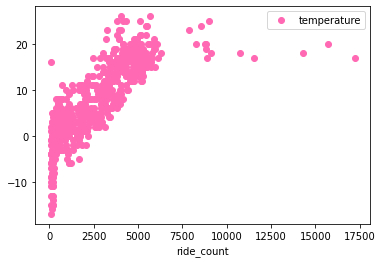

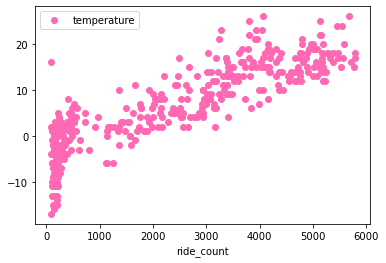

In [26]:
import numpy as np
import pandas as pd

# Kõik temperauutid ja päevad, mis andmestikus on
mudelile.plot(x='ride_count', y='temperature', style='o', color='hotpink')

# 30.04.2020 - 30.04.2021 periood ehk ühe aasta tulemused, kuidas temperatuur sõitude arvu mõjutas
vaiksem = mudelile.copy()
vaiksem = vaiksem.iloc[327:]

plt = vaiksem.plot(x='ride_count', y='temperature', style='o', color='hotpink')
#plt.xlabel("Number of rides per day")
#plt.ylabel("Average temperature in °C")

#plt.show()

# Kui tahate graafikut faili salvestada ↓
#plt.savefig("soitude_temperatuuride_graafik_esimenevariant.png")

### MODEL

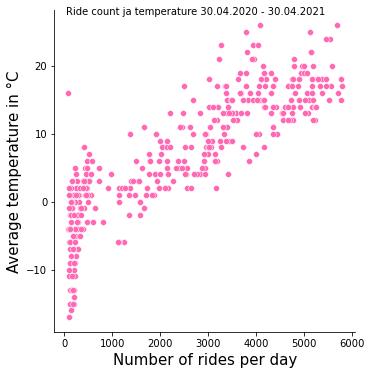

In [27]:
#visualization 
p = sns.relplot(x='ride_count', y='temperature',data=vaiksem, color='hotpink')
p.fig.suptitle("Ride count ja temperature 30.04.2020 - 30.04.2021", fontsize=10, fontdict={"weight": "bold"})
p.set_axis_labels('Number of rides per day', 'Average temperature in °C', fontsize=15)

# Graafiku faili salvestamine ↓
p.savefig("soitude_temperatuuride_graafik.png")

In [97]:
#model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

train = mudelile.drop(['start_date', 'ride_count', 'data_per_day', 'length', 'duration'], axis=1)
test = mudelile['ride_count']

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

(485, 6)
(485,)


In [98]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import numpy

# Other tried regressions:

#clf = linear_model.Lasso(alpha=0.1)

#poly_reg = PolynomialFeatures(degree=4)
#X_poly = poly_reg.fit_transform(train)

lin_regr = LinearRegression()
lin_regr.fit(x_train, y_train)
pred1 = lin_regr.predict(x_test)

pois_regr = linear_model.PoissonRegressor()
pois_regr.fit(train, test)
pred2 = pois_regr.predict(x_test)

lasso_regr = linear_model.Lasso(alpha=0.1)
lasso_regr.fit(x_train, y_train)
pred3 = lasso_regr.predict(x_test)

In [102]:
import numpy
from sklearn.metrics import r2_score

print("R2 score for linear regression: " + str(r2_score(y_test, pred1)))
print("R2 score for Poisson regression: " + str(r2_score(y_test, pred2)))
print("R2 score for Lasso regression: " + str(r2_score(y_test, pred3)))

R2 score for linear regression: 0.7512120977662299
R2 score for Poisson regression: 0.7691779580455377
R2 score for Lasso regression: 0.7512267530271846


### Plotting the results

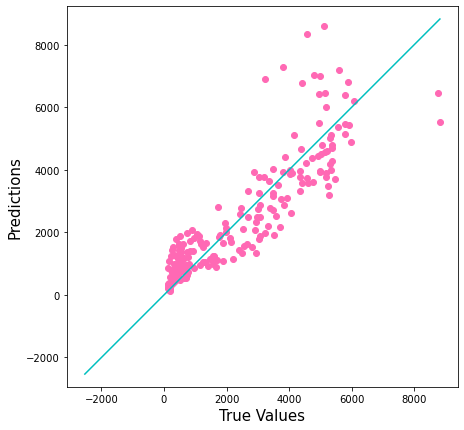

<Figure size 432x288 with 0 Axes>

In [100]:
#visualizing predicted and true values

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, pred2, c='hotpink')

p1 = max(max(pred3), max(y_test))
p2 = min(min(pred3), min(y_test))
plt.plot([p1, p2], [p1, p2], 'c-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

plt.show()

# Graafiku faili salvestamine ↓
plt.savefig("pred_true_graafik.png")

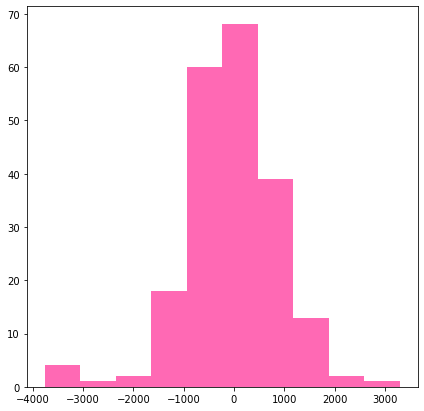

In [101]:
# plotting residuals

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.hist(y_test - pred2, color='hotpink')

plt.show()